#### RANDOM SAMPLE IMPUTATION

In [1]:
import pandas as pd
df = pd.read_csv('train.csv',usecols =['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [2]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [3]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [9]:
#To find out how man nan values are present in age column
df["Age"].isnull().sum()

177

In [16]:
#dropna()drops all the nan values from the column and sample("Takes input of how many values to be given a random value") randomly chooses any value from the column and the condition given inside makes sure that all the missing 177 values are filled randomly and random_state =0 is given because the random values filled should not change after each run
df["Age"].dropna().sample(df["Age"].isnull().sum(),random_state=0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [18]:
#Replacing Nan values with random sampling
def impute_nan(df,variable,median):
    #A new column will be created and all nan values will be replaced by median(Median used as the outliers will be removed) found out
    df[variable+"_median"]=df[variable].fillna(median)
    df[variable+"_random"]=df[variable]
    #It will have the random sample to fill na
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    #In order to merge the data set they need to have the same index so we match the index
    random_sample.index = df[df[variable].isnull()].index
    #To merge the random sample t0 variable_random 
    #df.loc[condition,column to be replaced withor stored into]=data frame holding the values
    df.loc[df[variable].isnull(),variable+"_random"]=random_sample

In [17]:
median = df.Age.median()
median

28.0

In [19]:
impute_nan(df,"Age",median)

In [20]:
df.head()

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


In [25]:
import pyodide_js
await pyodide_js.loadPackage("scipy")

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

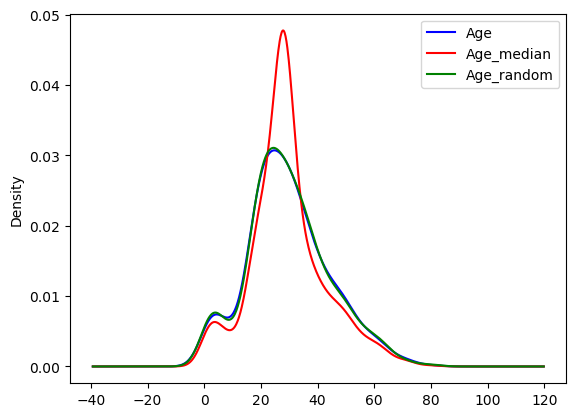

In [31]:
#red is median
#green is random sample
#blue is age
#we choose random sample over mean/median as there is less distortion between original column and altered column
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax,color='blue')
df.Age_median.plot(kind='kde', ax=ax, color='red')
df.Age_random.plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')